In [ ]:
# import library

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import file

In [93]:
file_location = "/Users/mingchang/Downloads/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)

In [ ]:
# what the data looks like

In [94]:
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


In [95]:
# experiment_id
a = my_data.experiment_id
np.unique(a)

array([12624548, 12624549])

In [ ]:
# first function

In [96]:
# for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = my_data.groupby('date')['spend_usd'].sum()
    return(series)

In [99]:
# test if this works
red = GetSeries(my_data, 12624548)
blue = GetSeries(my_data, 12624549)

In [98]:
# for any two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    df.plot()

In [102]:
# test if this works
date_series = my_data.date
index_series = np.unique(date_series)
#index_series

PlotSeries(index_series, red, blue)

array(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
       '2017-04-05', '2017-04-06', '2017-04-07'], dtype=object)

In [ ]:
# combine everything together

In [103]:
def PrintDailyTimeSeries(my_data, experiment_ids):
    # make sure our x-axis is consistent
    date_series = my_data.date
    index_series = np.unique(date_series) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0])
    control_series = GetSeries(my_data, experiment_ids[1])
    
    PlotSeries(index_series, treatment_series, control_series)

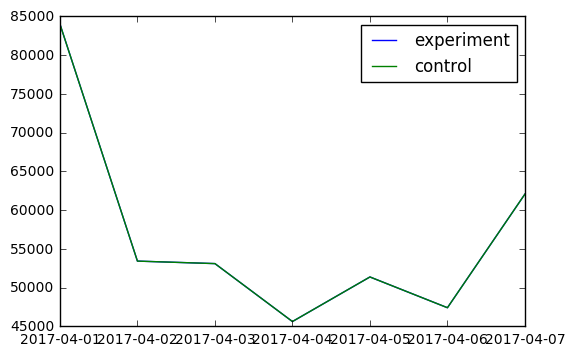

In [104]:
PrintDailyTimeSeries(my_data, [12624548,12624549])